In [1]:
import pandas as pd
import numpy as np
import librosa
import librosa.display

from scipy.io import wavfile
from scipy.fftpack import fft, fftfreq, rfft, rfftfreq, irfft
import scipy.signal as signal
from matplotlib.widgets import Slider, Button, RadioButtons

from bokeh.layouts import row, widgetbox
from bokeh.models import CustomJS, Slider
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.io import output_notebook
output_notebook()

import matplotlib.pyplot as plt
%matplotlib inline

train_df = pd.read_csv('train.csv')
def show_me(filename):
    rate, data = wavfile.read('audio_train/' + filename)
    plt.plot(data, '-')
    plt.show()
    print("framerate (sample rate): {}".format(rate))
    return rate, data

Loading BokehJS ...

### Functions

In [3]:
man_df = train_df[train_df['manually_verified'] == 1]
verified_df = man_df.groupby(by=['label', 'manually_verified']).count().sum(axis=1)
verified_df = verified_df.unstack().reindex(verified_df.unstack().sum(axis=1).sort_values().index)
# get all labels' manually verified filenames
verified_df.unstack()

scissors_verified_list = man_df['fname'][man_df['label'] == 'Scissors']
scissors_verified_list = scissors_verified_list.tolist()

# rate, signal = show_me(scissors_verified_list[0])
sr = 441000
y, sr = librosa.load('audio_train/' + scissors_verified_list[0], sr=sr)

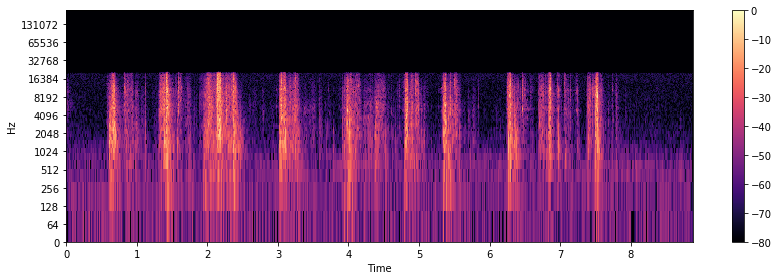

In [5]:
S_full, phase = librosa.magphase(librosa.stft(y))
idx = slice(*librosa.time_to_frames([0, 15], sr=sr))
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.amplitude_to_db(S_full[:, idx], ref=np.max), y_axis='log', x_axis='time', sr=sr)
plt.colorbar()
plt.tight_layout()

### Feature Engineering

#### Spectral Features

C:\Users\hp\Anaconda3\envs\intel-env\lib\site-packages\librosa\filters.py:271: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn('Empty filters detected in mel frequency basis. '


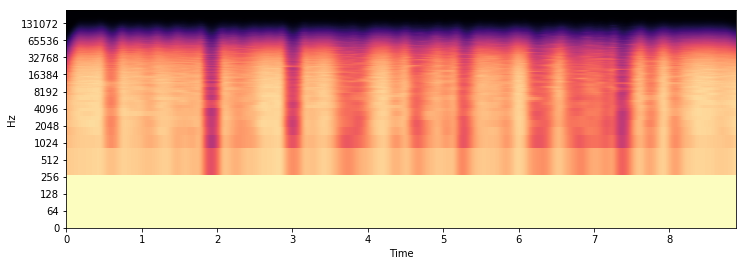

In [20]:
# chroma_stft
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.feature.tempogram(y=y, sr=sr), y_axis='log', x_axis='time', sr=sr)